Import necessary libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read dataset through csv file and analyse the content

In [14]:
netflixdf=pd.read_csv("C:\\Users\\SHUBHAM KADAM\\SHUBHAM PROJECTS\\Data analytics projects\\Netflix\\Netflixdata.csv")
print(netflixdf.info())
print("\nDescriptive analysis of Netflix users\n",netflixdf.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_no             5000 non-null   float64
 1   customer_id             5000 non-null   object 
 2   age                     5000 non-null   float64
 3   gender                  5000 non-null   object 
 4   subscription_type       5000 non-null   object 
 5   watch_hours             5001 non-null   float64
 6   last_login_days         5000 non-null   float64
 7   region                  5000 non-null   object 
 8   device                  5000 non-null   object 
 9   monthly_fee             5000 non-null   object 
 10  churned                 5000 non-null   object 
 11  payment_method          5000 non-null   object 
 12  number_of_profiles      5000 non-null   float64
 13  avg_watch_time_per_day  5000 non-null   float64
 14  favorite_genre          5000 non-null   

Number of user by age

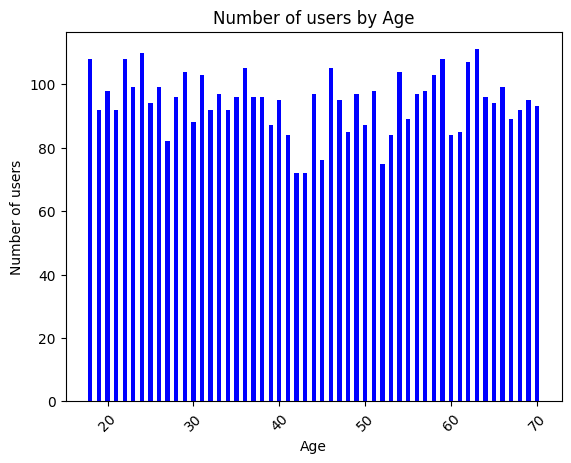

In [15]:
agedf=netflixdf.groupby('age')[['customer_no']].count()
plt.Figure(figsize=(10,5))
plt.bar(agedf.index,agedf['customer_no'],color='blue',width=0.5)
plt.title('Number of users by Age')
plt.xlabel('Age')
plt.ylabel("Number of users")
plt.xticks(rotation=45)
plt.show()

Subscription vise users

subscription_type
Basic       1661
Premium     1693
Standard    1646
Name: customer_no, dtype: int64


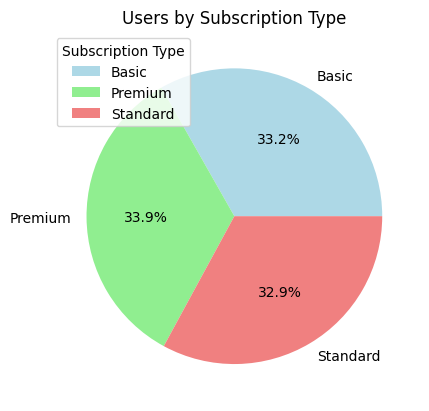

In [16]:
subscridf=netflixdf.groupby('subscription_type')['customer_no'].count()
print(subscridf)
plt.Figure(figsize=(10,5))
plt.title('Users by Subscription Type')
plt.pie(subscridf, labels=subscridf.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.legend(title='Subscription Type',loc='upper left')
plt.show()

Maximum Average watch time per day and watch hour by Region

               avg_watch_time_per_day  watch_hours
region                                            
Africa                          20.56       110.40
Asia                            98.42       101.06
Europe                          52.80        79.18
North America                   32.81        92.07
Oceania                         28.66        82.63
South America                   32.88        89.83


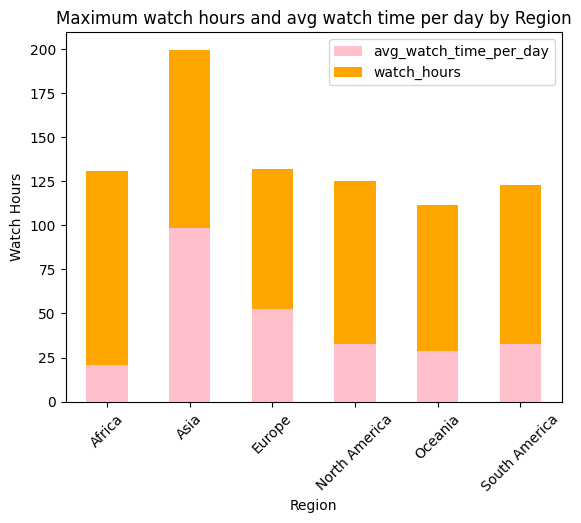

In [17]:
whratpdf=netflixdf.groupby('region')[['avg_watch_time_per_day','watch_hours']].max().sort_values(by='region',ascending=True)
print(whratpdf)
plt.Figure(figsize=(10,5))
whratpdf.plot(kind='bar',stacked=True,color=['pink','orange'])
plt.title('Maximum watch hours and avg watch time per day by Region')
plt.xlabel('Region')
plt.ylabel('Watch Hours')
plt.xticks(rotation=45)
plt.show()

Favorite genre of users

favorite_genre
Action         697
Comedy         685
Documentary    729
Drama          731
Horror         713
Romance        725
Sci-Fi         720
Name: customer_no, dtype: int64


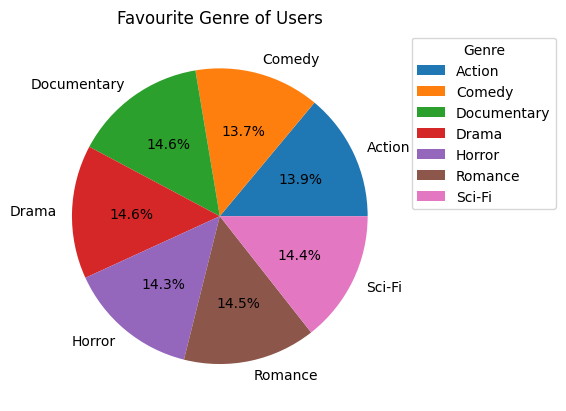

In [18]:
favgenredf=netflixdf.groupby('favorite_genre')['customer_no'].count()
print(favgenredf)
plt.Figure(figsize=(10,5))
plt.pie(favgenredf,labels=favgenredf.index,autopct='%1.1f%%')
plt.title('Favourite Genre of Users')
plt.legend(title='Genre',loc='lower left',bbox_to_anchor=(1,0.5))
plt.show()

Customers visualization with the grouping of selected columns

device  Desktop  Laptop  Mobile   TV  Tablet
gender                                      
Female      325     349     324  341     372
Male        310     322     342  331     349
Other       314     335     338  321     327


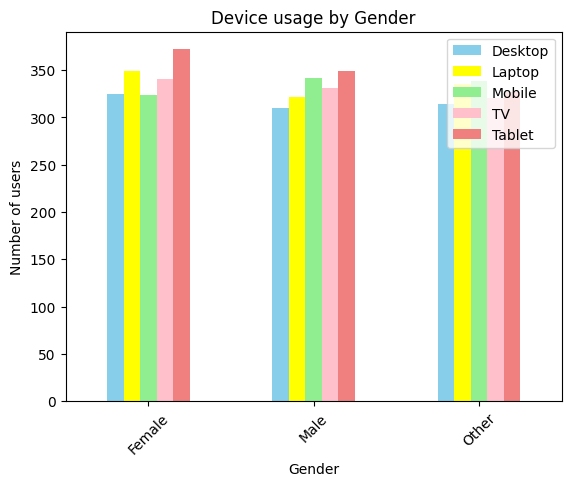

In [19]:
devdf = netflixdf.groupby(['gender', 'device'])['customer_no'].count().unstack() #unstack used for working with the grouped data 
print(devdf)
plt.Figure(figsize=(10,5))
devdf.plot(kind='bar', color=['skyblue','yellow','lightgreen','pink','lightcoral'])
plt.title("Device usage by Gender")
plt.xlabel('Gender')
plt.legend()
plt.ylabel('Number of users')
plt.xticks(rotation=45)
plt.show()


Customers relationship with company

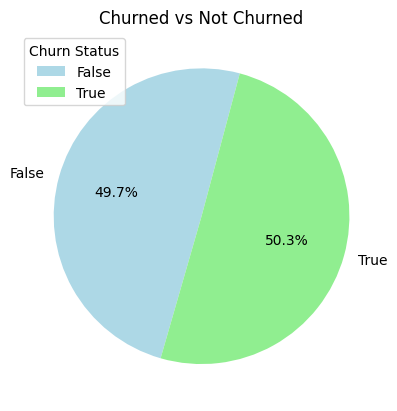

In [20]:
churndf=netflixdf.groupby('churned')['customer_no'].count()
plt.Figure(figsize=(10,5))
plt.pie(churndf,labels=churndf.index,autopct='%1.1f%%',colors=['lightblue','lightgreen'],startangle=75)
plt.title('Churned vs Not Churned')
plt.legend(title='Churn Status',loc='upper left')
plt.show()

Profiles of customer by Count of values

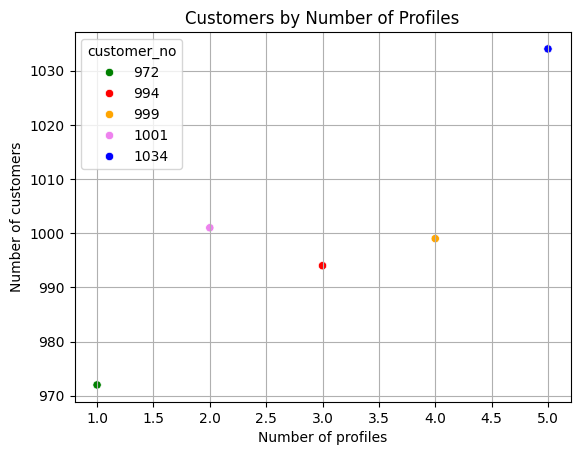

In [21]:
numprofiledf=netflixdf.groupby('number_of_profiles')['customer_no'].count().reset_index()
plt.Figure(figsize=(10,5))
sns.scatterplot(data=numprofiledf,x='number_of_profiles',y='customer_no',hue='customer_no',palette=['green','red','orange','violet','blue'])
plt.title('Customers by Number of Profiles')
plt.xlabel('Number of profiles')
plt.grid()
plt.ylabel('Number of customers')
plt.show()

Last days interacted customers

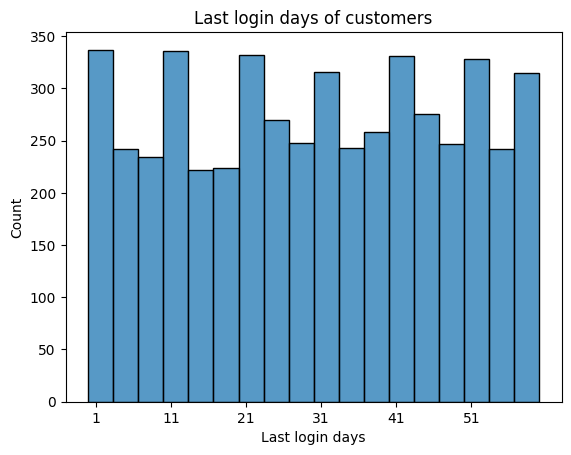

In [26]:
lastlogindf=netflixdf['last_login_days']
sns.histplot(lastlogindf)
plt.xlabel("Last login days")
plt.title("Last login days of customers")
plt.xticks(range(1,61,10))
plt.show()

Monthly expense of customers for application

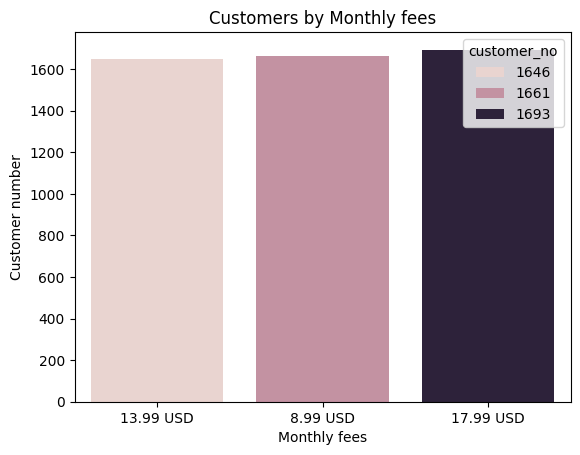

In [23]:
amtpaiddf=netflixdf.groupby('monthly_fee')['customer_no'].count().sort_values(ascending=True).reset_index()
plt.Figure(figsize=(10,5))
plt.title('Customers by Monthly fees')
sns.barplot(data=amtpaiddf,y='customer_no',x='monthly_fee',hue='customer_no')
plt.xlabel("Monthly fees")
plt.ylabel("Customer number")
plt.show()

Watch time of customers

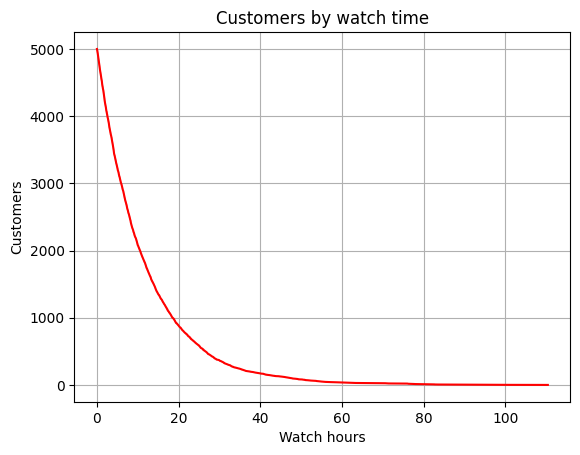

In [27]:
from turtle import color

plt.Figure(figsize=(10,5))
watchtimedf=netflixdf[['customer_no','watch_hours']]
sns.lineplot(watchtimedf,x="watch_hours",y="customer_no",color='red')
plt.title("Customers by watch time")
plt.xlabel("Watch hours")
plt.grid()
plt.ylabel("Customers")
plt.show()

# customers watch time is inversly proportional to customers numbers